In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gramwork/Gramworkx.csv


In [2]:
!pip install selenium
!pip install beautifulsoup4 
!pip install webdriver-manager

     |████████████████████████████████| 904 kB 1.2 MB/s 
     |████████████████████████████████| 115 kB 1.3 MB/s 


In [3]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

link = "https://agmarknet.gov.in/SearchCmmMkt.aspx?Tx_Commodity=78&Tx_State=KK&Tx_District=0&Tx_Market=0&DateFrom=01-Jan-2015&DateTo=01-Feb-2021&Fr_Date=01-Jan-2015&To_Date=01-Feb-2021&Tx_Trend=0&Tx_CommodityHead=Tomato&Tx_StateHead=Karnataka&Tx_DistrictHead=--Select--&Tx_MarketHead=--Select--"

with webdriver.Chrome(ChromeDriverManager().install()) as driver:
    driver.get(link)

    datalist = []
    
    wait = WebDriverWait(driver, 10)
    
    x = 1
    
    if x == 1:
        show_more = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"#cphBody_GridPriceData > tbody > tr:nth-child(52) > td > table > tbody > tr > td:nth-child(1) > input[type=image]")))
        #driver.execute_script("arguments[0].click();",show_more)
        show_more.click()
        time.sleep(20)

        for elem in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,"#cphBody_GridPriceData tr"))):
            data = [item.text for item in elem.find_elements_by_css_selector("td")]
            datalist.append(data)
        x = x + 1
    
    while x < 712:
        show_more = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"#cphBody_GridPriceData > tbody > tr:nth-child(52) > td > table > tbody > tr > td:nth-child(3) > input[type=image]")))
        #driver.execute_script("arguments[0].click();",show_more)
        show_more.click()
        time.sleep(20)

        for elem in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,"#cphBody_GridPriceData tr"))):
            data = [item.text for item in elem.find_elements_by_css_selector("td")]
            datalist.append(data)
        x = x + 1
        

[WDM] - ====== WebDriver manager ======


ValueError: Could not get version for Chrome with this command: google-chrome --version || google-chrome-stable --version

In [4]:
df = pd.DataFrame(datalist)
print(df)

NameError: name 'datalist' is not defined

In [5]:
df.to_csv('GramworkX.csv')

NameError: name 'df' is not defined

In [6]:
data = pd.read_csv("/kaggle/input/gramwork/Gramworkx.csv")
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,51.0,Hassan,Arasikere,Tomato,Tomato,FAQ,2000.0,2000.0,2000.0,08 Mar 2017
2,2,52.0,Hassan,Arasikere,Tomato,Tomato,FAQ,1000.0,1000.0,1000.0,02 Aug 2016
3,3,53.0,Hassan,Arasikere,Tomato,Tomato,FAQ,1000.0,1000.0,1000.0,30 Jul 2016
4,4,54.0,Hassan,Arasikere,Tomato,Tomato,FAQ,1000.0,1000.0,1000.0,26 Jul 2016


In [7]:
data.columns = ['Sl no', 'Unnamed', 'District Name', 'Market Name', 'Commodity', 'Variety', 'Grade', 'Min Price', 'Max Price', 'Modal Price', 'Price Date']
print(data)

       Sl no  Unnamed District Name Market Name Commodity Variety Grade  \
0          0      NaN           NaN         NaN       NaN     NaN   NaN   
1          1     51.0        Hassan   Arasikere    Tomato  Tomato   FAQ   
2          2     52.0        Hassan   Arasikere    Tomato  Tomato   FAQ   
3          3     53.0        Hassan   Arasikere    Tomato  Tomato   FAQ   
4          4     54.0        Hassan   Arasikere    Tomato  Tomato   FAQ   
...      ...      ...           ...         ...       ...     ...   ...   
37619  37619  35542.0         Udupi       Udupi    Tomato  Tomato   FAQ   
37620  37620  35543.0         Udupi       Udupi    Tomato  Tomato   FAQ   
37621  37621  35544.0         Udupi       Udupi    Tomato  Tomato   FAQ   
37622  37622      NaN           NaN         NaN       NaN     NaN   NaN   
37623  37623      NaN           NaN         NaN       NaN     NaN   NaN   

       Min Price  Max Price  Modal Price   Price Date  
0            NaN        NaN          NaN   

In [8]:
data.drop(columns = ['Unnamed', 'Min Price', 'Max Price'], inplace = True)
data.dropna(axis = 0, inplace = True)
print(data)

       Sl no District Name Market Name Commodity Variety   Grade  Modal Price  \
1          1        Hassan   Arasikere    Tomato  Tomato     FAQ       2000.0   
2          2        Hassan   Arasikere    Tomato  Tomato     FAQ       1000.0   
3          3        Hassan   Arasikere    Tomato  Tomato     FAQ       1000.0   
4          4        Hassan   Arasikere    Tomato  Tomato     FAQ       1000.0   
5          5        Hassan   Arasikere    Tomato  Tomato  Medium       1000.0   
...      ...           ...         ...       ...     ...     ...          ...   
37617  37617         Udupi       Udupi    Tomato  Tomato  Medium       1200.0   
37618  37618         Udupi       Udupi    Tomato  Tomato     FAQ       1200.0   
37619  37619         Udupi       Udupi    Tomato  Tomato     FAQ       1700.0   
37620  37620         Udupi       Udupi    Tomato  Tomato     FAQ       1600.0   
37621  37621         Udupi       Udupi    Tomato  Tomato     FAQ       1600.0   

        Price Date  
1     

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35494 entries, 1 to 37621
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl no          35494 non-null  int64  
 1   District Name  35494 non-null  object 
 2   Market Name    35494 non-null  object 
 3   Commodity      35494 non-null  object 
 4   Variety        35494 non-null  object 
 5   Grade          35494 non-null  object 
 6   Modal Price    35494 non-null  float64
 7   Price Date     35494 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.4+ MB


In [10]:
data['Price Date'] = pd.to_datetime(data['Price Date'])

In [11]:
data.head(10)

,Sl no,District Name,Market Name,Commodity,Variety,Grade,Modal Price,Price Date
1,1,Hassan,Arasikere,Tomato,Tomato,FAQ,2000.0,2017-03-08
2,2,Hassan,Arasikere,Tomato,Tomato,FAQ,1000.0,2016-08-02
3,3,Hassan,Arasikere,Tomato,Tomato,FAQ,1000.0,2016-07-30
4,4,Hassan,Arasikere,Tomato,Tomato,FAQ,1000.0,2016-07-26
5,5,Hassan,Arasikere,Tomato,Tomato,Medium,1000.0,2016-07-23
6,6,Hassan,Arasikere,Tomato,Tomato,FAQ,1500.0,2016-07-02
7,7,Hassan,Arasikere,Tomato,Tomato,FAQ,2000.0,2016-06-27
8,8,Hassan,Arasikere,Tomato,Tomato,FAQ,4000.0,2016-06-22
9,9,Hassan,Arasikere,Tomato,Tomato,FAQ,3000.0,2016-06-13
10,10,Hassan,Arasikere,Tomato,Tomato,FAQ,1000.0,2016-04-30


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35494 entries, 1 to 37621
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sl no          35494 non-null  int64         
 1   District Name  35494 non-null  object        
 2   Market Name    35494 non-null  object        
 3   Commodity      35494 non-null  object        
 4   Variety        35494 non-null  object        
 5   Grade          35494 non-null  object        
 6   Modal Price    35494 non-null  float64       
 7   Price Date     35494 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 2.4+ MB


In [13]:
data['District Name'].nunique()

20

In [14]:
import matplotlib.pyplot as plt

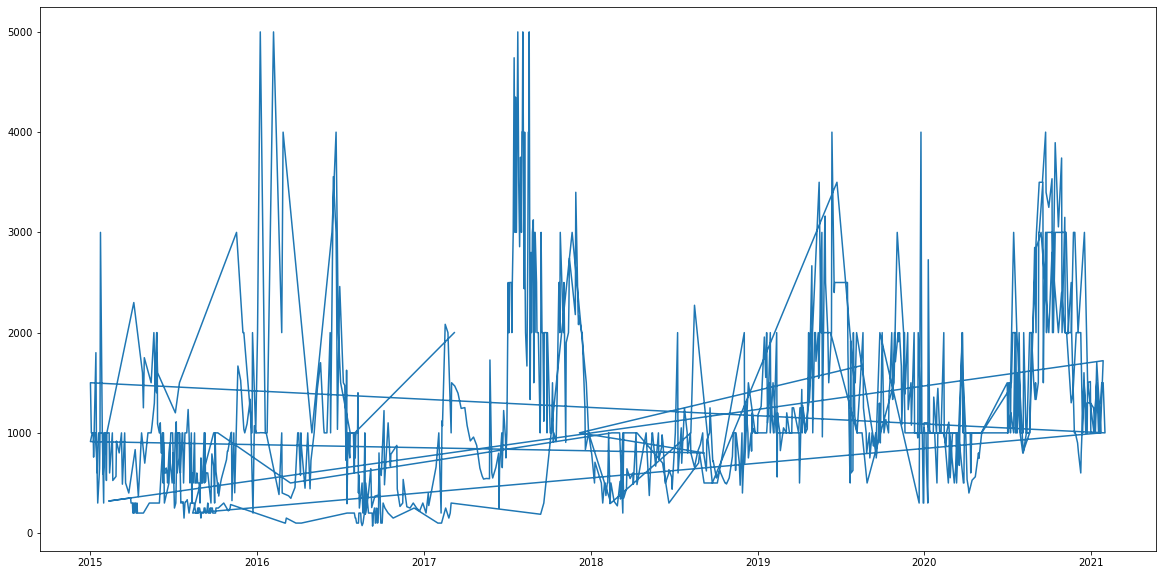

In [15]:
plt.rcParams["figure.figsize"] = (20,10)
data_Hassan = data.loc[data['District Name'] == 'Hassan']
data_Hassan.sort_values('Price Date')
plt.plot(data_Hassan['Price Date'], data_Hassan['Modal Price'])

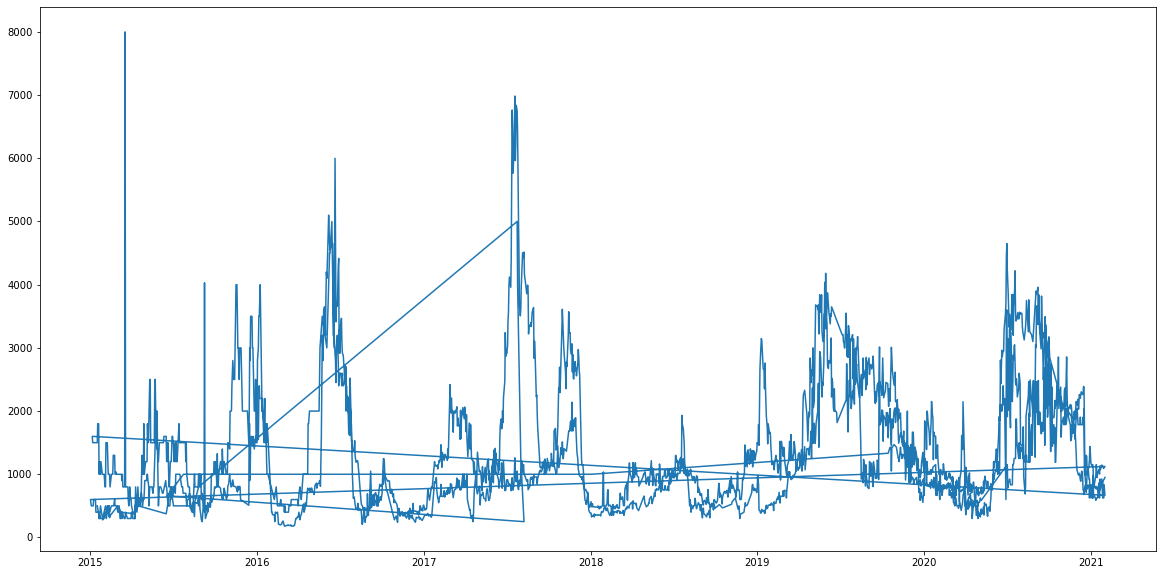

In [16]:
plt.rcParams["figure.figsize"] = (20,10)
data_Chikmagalur = data.loc[data['District Name'] == 'Chikmagalur']
data_Chikmagalur.sort_values('Price Date')
plt.plot(data_Chikmagalur['Price Date'], data_Chikmagalur['Modal Price'])

In [17]:
data

,Sl no,District Name,Market Name,Commodity,Variety,Grade,Modal Price,Price Date
1,1,Hassan,Arasikere,Tomato,Tomato,FAQ,2000.0,2017-03-08
2,2,Hassan,Arasikere,Tomato,Tomato,FAQ,1000.0,2016-08-02
3,3,Hassan,Arasikere,Tomato,Tomato,FAQ,1000.0,2016-07-30
4,4,Hassan,Arasikere,Tomato,Tomato,FAQ,1000.0,2016-07-26
5,5,Hassan,Arasikere,Tomato,Tomato,Medium,1000.0,2016-07-23
...,...,...,...,...,...,...,...,...
37617,37617,Udupi,Udupi,Tomato,Tomato,Medium,1200.0,2015-01-28
37618,37618,Udupi,Udupi,Tomato,Tomato,FAQ,1200.0,2015-01-28
37619,37619,Udupi,Udupi,Tomato,Tomato,FAQ,1700.0,2015-01-21
37620,37620,Udupi,Udupi,Tomato,Tomato,FAQ,1600.0,2015-01-14


In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Remove rows with missing target, separate target from predictors
y = data['Modal Price'].copy()              
data.drop(['Modal Price'], axis=1, inplace=True)

# Break off validation set from training data
X_train, X_test_full, y_train, y_test_full = train_test_split(data, y, train_size=0.8, test_size=0.2, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_test_full, y_test_full, train_size=0.5, test_size=0.5, random_state=0)

# Select numeric columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Select categorical columns
categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].dtype == "object"]

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Define the model
xgb = XGBRegressor()

param_grid = {'n_estimators' : [50, 100, 200, 500, 1000],
              'learning_rate' : [0.3, 0.1, 0.033, 0.011, 0.003, 0.001]
             }

better_xgb = GridSearchCV(xgb, param_grid, cv = 5, verbose = 5)

# Pipeline the model with preprocessing
improved_xgb = Pipeline(steps = [('preprocessor', preprocessor),
                          ('model', better_xgb)])

# fit the model
improved_xgb.fit(X_train, y_train)

pred_imp_xgb = improved_xgb.predict(X_valid)
mae_imp_xgb = mean_absolute_error(pred_imp_xgb, y_valid)

print("MAE with GridSearchCV improved XGB : ", mae_imp_xgb)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .............learning_rate=0.3, n_estimators=50; total time=   0.7s
[CV 2/5] END .............learning_rate=0.3, n_estimators=50; total time=   0.6s
[CV 3/5] END .............learning_rate=0.3, n_estimators=50; total time=   0.6s
[CV 4/5] END .............learning_rate=0.3, n_estimators=50; total time=   0.6s
[CV 5/5] END .............learning_rate=0.3, n_estimators=50; total time=   0.6s
[CV 1/5] END ............learning_rate=0.3, n_estimators=100; total time=   1.2s
[CV 2/5] END ............learning_rate=0.3, n_estimators=100; total time=   1.2s
[CV 3/5] END ............learning_rate=0.3, n_estimators=100; total time=   1.2s
[CV 4/5] END ............learning_rate=0.3, n_estimators=100; total time=   1.2s
[CV 5/5] END ............learning_rate=0.3, n_estimators=100; total time=   1.2s
[CV 1/5] END ............learning_rate=0.3, n_estimators=200; total time=   3.1s
[CV 2/5] END ............learning_rate=0.3, n_e

In [21]:
imp_xgb_preds = improved_xgb.predict(X_test)
# Save test predictions to file
output = pd.DataFrame({'y_test': y_test,
                       'Predicted y_test': imp_xgb_preds})
print(output)

       y_test  Predicted y_test
15294  3750.0       3745.861328
33056  1100.0        914.184631
30470  2500.0       2818.659912
35451   233.0        292.395844
21968   666.0        651.580688
...       ...               ...
17202  1100.0       1387.048828
17903  1150.0       1114.558838
29370   700.0        699.722656
21414  1078.0       1259.823364
10875  2773.0       2902.334961

[3550 rows x 2 columns]


In [22]:
output.to_csv('output.csv', index=False)